# 1.0 Importing Python Libraries
- Use pandas for preprocessing, mlxtend for plotting, seaborn for visual representation, matplotlib for plotting graph

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from mlxtend.plotting import plot_decision_regions
from pandas.plotting import scatter_matrix

warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

# 2.0 Data Processing 
- Replace missing values by mapping numerical mean into missing datasets
- Created new column called 'diabetic_status' reffering to the level of 'avg_glucose_level'
- Categorize categorical columns and convert to numerical values using mapping method


In [2]:
data= pd.read_csv('C:/Users/lijie/Downloads/stroke-dataset-ruthvik_.csv',header=0)

# dropping 'id' column because it has no substantial meaning for model
data = data.drop('id', axis=1)

# Fill missing values in 'bmi' column with the mean
mean_bmi = data['bmi'].mean()
mean_bmi_new = round(mean_bmi, 2)
data['bmi'] = data['bmi'].fillna(mean_bmi_new)



# Creating a new column called "diabetic_status to categorize group of diabetic prone individuals based on their average glucose level"
# Avg glucose levels (x < 140)= Normal = 0
# Avg glucose levels (200 > x > 139)= pre-diabetes = 1
# Avg glucose levels (x > 200)= Diabetes = 2
data.insert(10, 'diabetic_status', 0)
data.loc[(data['avg_glucose_level'] > 139) & (data['avg_glucose_level'] < 200), 'diabetic_status'] = 1
data.loc[data['avg_glucose_level'] >= 200, 'diabetic_status'] = 2



categoricalVal= ['gender', 'ever_married', 'work_type', 'Residence_type',
                       'smoking_status']

# Convert categorical values into numerical based on their impact to stroke
smoking_mapping = {
    'smokes': 2,
    'formerly smoked': 1,
    'never smoked': 0
}
Yesno_mapping = {
    'Yes':1, 'No':0
}
Gender_mapping={
    'Male':1, 'Female':0,
}
Working_mapping={
    'Private': 4,'Self-employed': 3, 'Govt_job': 2,'children':1,'Never_worked':0
}
Residence_type_mapping={
    'Urban':1, 'Rural':0
}

data['smoking_status'] = data['smoking_status'].map(smoking_mapping)
data['ever_married'] = data['ever_married'].map(Yesno_mapping)
data['gender'] = data['gender'].map(Gender_mapping)
data['work_type'] = data['work_type'].map(Working_mapping)
data['Residence_type'] = data['Residence_type'].map(Residence_type_mapping)




# Converting the 'smoking_status' categorical column into values weightage (0,1,2) based on whether they smoke, used to smoke or don't smoke
# Using imputation method to fill empty values in the column and rounding it off to the nearest value


# Fill missing values in the 'gender' column with the mode
gender_mode = data['gender'].mode()[0]
data['gender'].fillna(gender_mode, inplace=True)


mean_smoking_status = data['smoking_status'].mean()
mean_smoking_new = round(mean_smoking_status,1)
data['smoking_status'] = data['smoking_status'].fillna(mean_smoking_new)



data.to_csv("C:/Users/lijie/Downloads/ruthviktester.csv", index=False)
print(data)


      gender   age  hypertension  heart_disease  ever_married  work_type   
0        1.0  67.0             0              1             1          4  \
1        0.0  61.0             0              0             1          3   
2        1.0  80.0             0              1             1          4   
3        0.0  49.0             0              0             1          4   
4        0.0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105     0.0  80.0             1              0             1          4   
5106     0.0  81.0             0              0             1          3   
5107     0.0  35.0             0              0             1          3   
5108     1.0  51.0             0              0             1          4   
5109     0.0  44.0             0              0             1          2   

      Residence_type  avg_glucose_level    bmi  smoking_status   
0                  1 

# 3.1 Data Exploration
- Understand data better with count, mean, std deviation, first/third/inter- quartile ranges, maximum values

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,5110.0,0.413894,0.492578,0.00,0.000,0.000,1.00,1.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
ever_married,5110.0,0.656164,0.475034,0.00,0.000,1.000,1.00,1.00
work_type,5110.0,3.162035,1.118698,0.00,2.000,4.000,4.00,4.00
Residence_type,5110.0,0.508023,0.499985,0.00,0.000,1.000,1.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893110,7.698018,10.30,23.800,28.400,32.80,97.60
smoking_status,5110.0,0.693503,0.676757,0.00,0.000,0.700,1.00,2.00


# 3.2 Ensure that the dataset has no missing values after data processing 
- Use pandas isnull().sum() function to totalise empty cells in the dataset

In [4]:
data.isnull().sum()
class_counts = data['stroke'].value_counts()
print(class_counts)


stroke
0    4861
1     249
Name: count, dtype: int64


# 4.0 Implement KNN model 
- This is a KNN classification model on a stroke dataset after handling class imbalance through oversampling using the (import imblearn using RandomOverSampler)
- The model evaluates different k values to find the optimal number of neighbor and finds the average accuracy, maximum training score, and maximum testing score achieved
- Different values of k every iteration inside the loop will vary the results and accuracy of the KNN classifier
- 'Stroke' column is used as the output variable (y) while independent variables are all except 'stroke' columns (X) 
- Implementation of random oversampling is applied to balance the class distribution due to the (class=0) being the majority over the (class=1)[stroke positive]

In [5]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Assuming 'data' is the DataFrame containing the dataset

sc_X = StandardScaler()
X = data.drop(["stroke"], axis=1)  # Remove 'stroke' column
X = pd.DataFrame(sc_X.fit_transform(X), columns=data.columns[:-1])  # Scale and use original column names
y = data['stroke']

# Perform oversampling to balance the class distribution
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=1/3, random_state=42, stratify=y_resampled)

test_scores = []
train_scores = []

for i in range(1, 11):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    y_pred = knn.predict(X_test)
    test_scores.append(accuracy_score(y_test, y_pred))

average_accuracy = np.mean(test_scores)
print("Average Accuracy: {:.2f}%".format(average_accuracy * 100))
    
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100, list(map(lambda x: x+1, train_scores_ind))))

max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100, list(map(lambda x: x+1, test_scores_ind))))





Average Accuracy: 91.71%
Max train score 100.0 % and k = [1, 2]
Max test score 96.48256710891701 % and k = [1, 2]


# 5.0 Model results analysis
- Create visual graph to evaluate train and test scores using "matplotlib"
- Analyse whether trained data is overfitting or underfitting the dataset based on the train score and test score lines
- The results shows no overfitting or underfitting and suggest that the model fits the testing data 

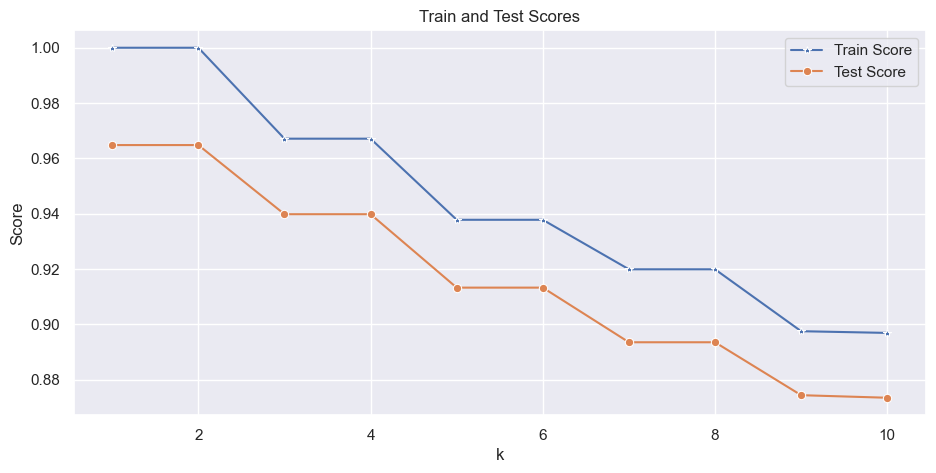

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'train_scores' and 'test_scores' are populated correctly

plt.figure(figsize=(11, 5))
sns.lineplot(x=range(1, 11), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1, 11), y=test_scores, marker='o', label='Test Score')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Train and Test Scores')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score

# Assuming you have the predicted labels 'y_pred' and the actual labels 'y_true'





# 5.1 Obtain the accuracy of the trained model with the latest K value

In [7]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8571428571428571

# 5.2 Confusion Matrix graph classification results representation

Text(0.5, 20.049999999999997, 'Predicted label')

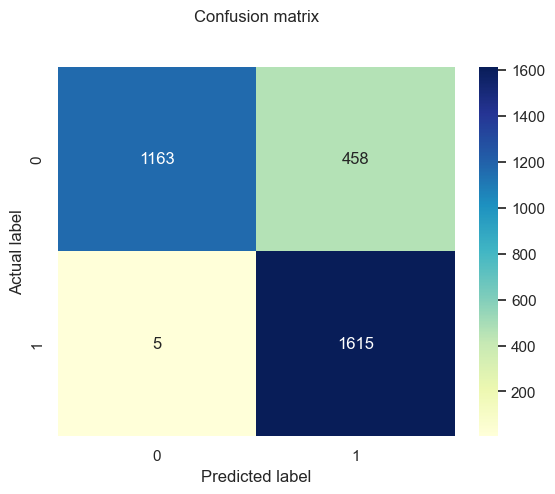

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# 5.3 Perform classification report based on the y_test values and y_pred values
- Classification report results shows both class=0 and class=1 accuracy are similar with f1-scores at the range (83% to 87%)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.72      0.83      1621
           1       0.78      1.00      0.87      1620

    accuracy                           0.86      3241
   macro avg       0.89      0.86      0.85      3241
weighted avg       0.89      0.86      0.85      3241

